<a href="https://colab.research.google.com/github/LinaHu1990/Assignments/blob/main/Income_inequality_in_relation_to_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Income inequality in relation to GDP

## Question: is there a relation between a country's Gross Domestic Product (GDP) and its income inequality?


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [45]:
# Obtain clean data for GDP by removing data that is not needed

def gdp_clean():
  url_gdp = pd.read_csv('https://raw.githubusercontent.com/LinaHu1990/Assignments/main/gdp-per-capita-maddison.csv')
  gdp = pd.DataFrame(url_gdp)
  df_gdp = gdp.drop("417485-annotations", axis = 1)
  return df_gdp

df_gdp = gdp_clean()


In [46]:
 # Obtain clean data for income inequality (use gini coefficient) by removing data that is not needed

def income_clean():
  url_income = pd.read_csv("https://raw.githubusercontent.com/LinaHu1990/Assignments/main/inequality.csv")
  df = pd.DataFrame (url_income)
  mapping = {df.columns[0]: 'Entity', df.columns[2]: 'Gini'}
  df_income = df.rename(columns=mapping)
  df_clean = df_income.loc[:, ['Entity', 'Year', 'Gini']].dropna()
  return df_clean

df_income = income_clean()


PearsonRResult(statistic=-0.3282081935166466, pvalue=3.01527344813546e-70)

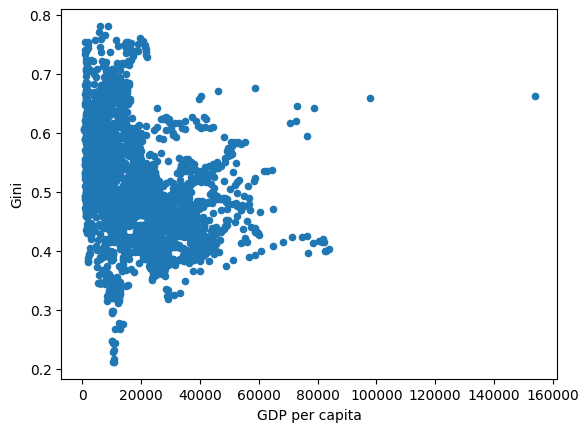

In [51]:
# Merge both dataframes

df_GDP_GINI = pd.merge(df_income, df_gdp, on = ['Entity', 'Year'])

#calculate Pearson Correlation and P-value (significance) based on merged dataframe

pearson = pearsonr(df_GDP_GINI['Gini'], df_GDP_GINI['GDP per capita'])

display (pearson)

graph = df_GDP_GINI.plot(x= 'GDP per capita', y = 'Gini', kind = 'scatter')
plt.show()


# Answer to question. Result shows there is a negative Pearson correlation factor of -0.328 between the Gini coëfficiënt and GDP per country. The correlation suggests that a higher income inequality has a negative impact on GDP per capita. As per Rea and Parker (2014) a correlation of -0.328 implies a moderate correlation/relation. The P-value is below 0.05 and is considered to be statistically significant

